In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.optimize as opt
import gdown

np.random.seed(27)

In [ ]:
file_id = '1Lr6fV3V00kV8j466166UNelpqY_Kgq8J'
url = f'https://drive.google.com/uc?id={file_id}'

output = '24_Варианты_УИР1.csv'
gdown.download(url, output, quiet=False)

variant = '75'
data = pd.read_csv(output,  usecols=[variant]).iloc[:-5, :]
data[variant] = data[variant].str.replace(',', '.').astype(float)
arr = data[variant].values

data

Downloading...
From: https://drive.google.com/uc?id=1Lr6fV3V00kV8j466166UNelpqY_Kgq8J
To: /content/24_Варианты_УИР1.csv
100%|██████████| 125k/125k [00:00<00:00, 48.7MB/s]


,75
0,151.990
1,50.590
2,3.610
3,16.660
4,17.490
...,...
295,2.820
296,36.770
297,140.760
298,130.160


In [ ]:
sample_sizes = [10, 20, 50, 100, 200, 300]

samples = {}

for size in sample_sizes:
    samples[size] = np.random.choice(arr, size, replace=False)

## Вычисление основных статистических характеристик полного ряда и случайных выборок


Эталонное значение для выборки из 300 элементов

In [ ]:
mean_full = arr.mean()
var_full = arr.var()
std_full = arr.std()
cov_full = std_full / mean_full

## Найдем оценки математического ожидания, дисперсии, среднеквадратического
отклонения, коэффициента вариации заданной числовой
последовательности и доверительные интервалы для полного ряда из 300 элементов

In [ ]:
confidence_levels = [0.99, 0.95, 0.90]

margins = {}

for confidence in confidence_levels:
    z_value = stats.norm.ppf(1 - (1 - confidence) / 2)

    margins[confidence] = z_value * (std_full / np.sqrt(300))


print(f"""
    Статистики для полного ряда:
    Матожидание: {mean_full}
    Дисперсия: {var_full}
    СКО: {std_full}
    Ковариация: {cov_full}
    Доверительный интервал (0.9): {margins[0.9]}
    Доверительный интервал (0.95): {margins[0.95]}
    Доверительный интервал (0.99): {margins[0.99]}
""")


    Статистики для полного ряда:
    Матожидание: 57.57899666666667
    Дисперсия: 3760.102400663322
    СКО: 61.31967384668091
    Ковариация: 1.0649660014339877
    Доверительный интервал (0.9): 5.823263814747161
    Доверительный интервал (0.95): 6.938846814310784
    Доверительный интервал (0.99): 9.119190504581127




Та же история, только для всех подвыборок из [10, 20, ... 300] элементов

In [ ]:
local = {}

for size in sample_sizes:
    t = samples[size]

    mean_local = t.mean()
    var_local = t.var()
    std_local = t.std()
    cov_local = std_local / mean_local

    confidence_levels = [0.99, 0.95, 0.90]

    margins_local = {}

    for confidence in confidence_levels:
        z_value = stats.norm.ppf(1 - (1 - confidence) / 2)

        margins_local[confidence] = z_value * (std_local / np.sqrt(size))

    local[size] = {
        'mean': mean_local,
        'var': var_local,
        'std': std_local,
        'cov': cov_local,
        'margins': margins_local
    }

    print(f"""
        Статистики для ряда длиной {size}:
        Матожидание: {mean_local} ({100 * np.abs(mean_local - mean_full) / mean_full})
        Дисперсия: {var_local} ({100 * np.abs(var_local - var_full) / var_full})
        СКО: {std_local} ({100 * np.abs(std_local - std_full) / std_full})
        Ковариация: {cov_local} ({100 * np.abs(cov_local - cov_full) / cov_full})
        Доверительный интервал (0.9): {margins_local[0.9]} ({100 * np.abs(margins_local[0.9] - margins[0.9]) / margins[0.9]})
        Доверительный интервал (0.95): {margins_local[0.95]} ({100 * np.abs(margins_local[0.95] - margins[0.95]) / margins[0.95]})
        Доверительный интервал (0.99): {margins_local[0.99]} ({100 * np.abs(margins_local[0.99] - margins[0.99]) / margins[0.99]})
    """)


        Статистики для ряда длиной 10:
        Матожидание: 39.872 (30.752527295977547)
        Дисперсия: 1170.3800159999998 (68.87371961482931)
        СКО: 34.21081723665776 (44.209068492119)
        Ковариация: 0.8580160823800602 (19.4325376373769)
        Доверительный интервал (0.9): 17.794701433552863 (205.57951691092128)
        Доверительный интервал (0.95): 21.203694574359748 (205.5795169109213)
        Доверительный интервал (0.99): 27.866378290085617 (205.57951691092134)
    

        Статистики для ряда длиной 20:
        Матожидание: 59.102 (2.6450675098599232)
        Дисперсия: 1779.5012359999996 (52.674128351236476)
        СКО: 42.1841348850489 (31.20619820887676)
        Ковариация: 0.7137513939468868 (32.978950221339154)
        Доверительный интервал (0.9): 15.515343890185765 (166.4372486593143)
        Доверительный интервал (0.95): 18.48767254073413 (166.4372486593143)
        Доверительный интервал (0.99): 24.296920280407395 (166.43724865931432)
    

        С

## График последовательности

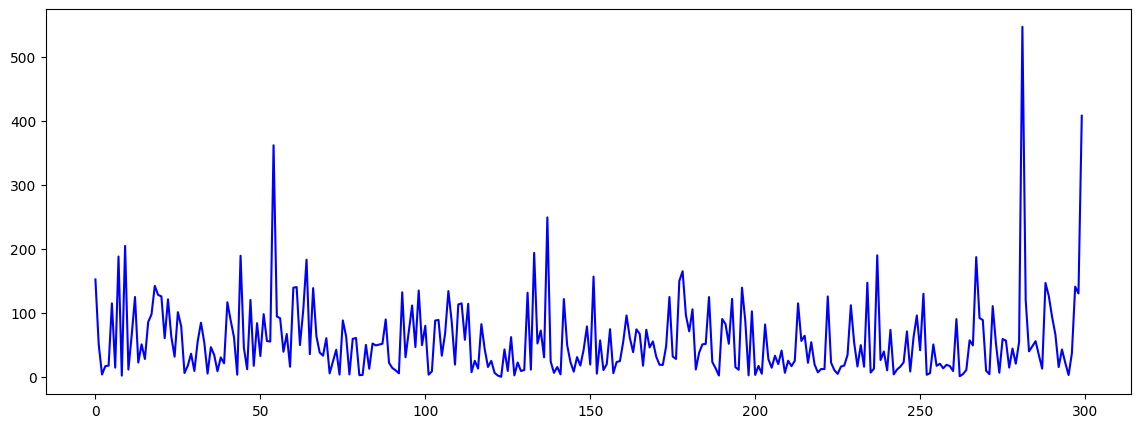

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(arr, color='blue')

## Автокорреляционный анализ

In [ ]:
autocorrelation = sm.tsa.acf(arr, nlags=10)

autocorr_df = pd.DataFrame({
    'Lag': np.arange(len(autocorrelation)),
    'Autocorrelation': autocorrelation
})

autocorr_df

,Lag,Autocorrelation
0,0,1.000000
1,1,0.064917
2,2,0.079069
3,3,0.030943
4,4,-0.021989
5,5,-0.008256
6,6,-0.022973
7,7,0.090840
8,8,-0.028862
9,9,0.119832


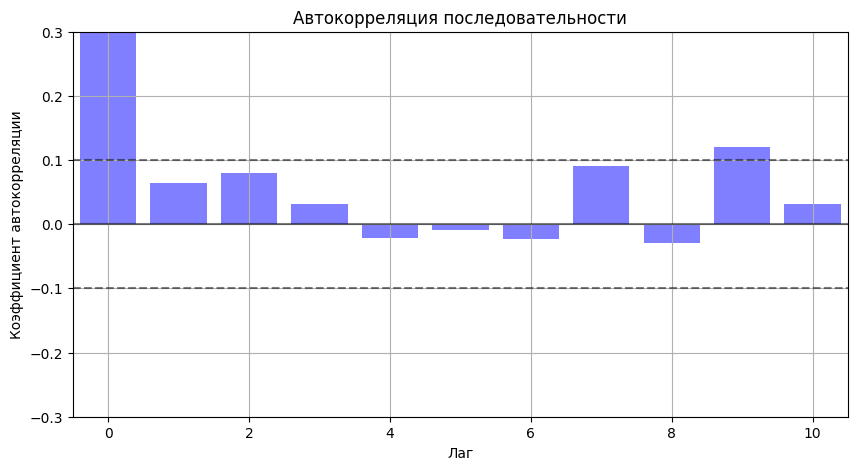

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(autocorr_df['Lag'], autocorr_df['Autocorrelation'], color='blue', alpha=0.5)
plt.axhline(0, color='black', alpha=0.5, linestyle='-')
plt.axhline(0.1, color='black', alpha=0.5, linestyle='--')
plt.axhline(-0.1, color='black', alpha=0.5, linestyle='--')
plt.title('Автокорреляция последовательности')
plt.xlabel('Лаг')
plt.ylabel('Коэффициент автокорреляции')
plt.xlim(-0.5, 10.5)
plt.ylim(-0.3, 0.3)
plt.grid()

## Гистограмма распределения частот

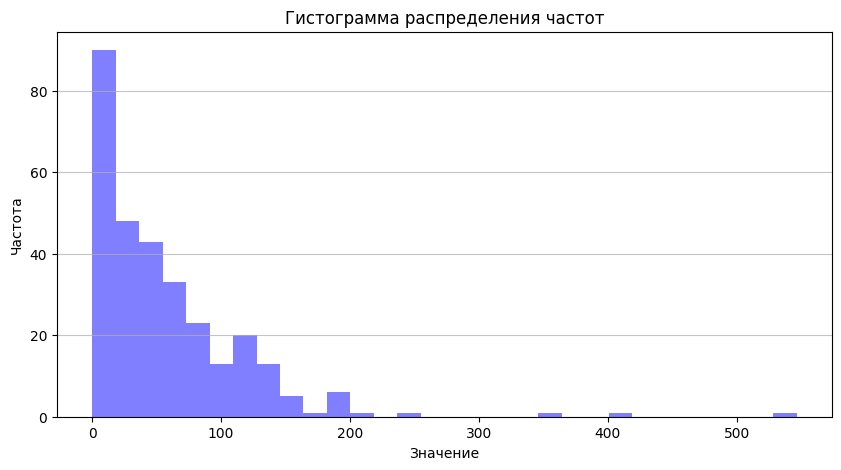

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(arr, bins=30, color='blue', alpha=0.5)

# 3. Настройки графика
plt.title('Гистограмма распределения частот')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

Так как наше распределение имеет коэффициент ковариации более, чем 1, будем использовать гиперэкспоненциальное распредедение для аппроксимации.

$q \leq \frac{2}{1 + 1.0649660014339877^2} = 0.97$

Возьмем, например $q = 0.5$

In [ ]:
q = 0.95

t1 = (1 + np.sqrt(((1 - q) / (2 * q)) * (cov_full * cov_full  - 1))) * arr.mean()
t2 = (1 - np.sqrt(((q) / (2 * (1 - q))) * (cov_full * cov_full - 1))) * arr.mean()


q, t1, t2

(0.9302, 61.66395997758143, 3.140130308315613)

## Алгоритм получения выборки из гиперэкспоненциального распределения

In [ ]:
def hyperexponential_sample(size, t1, t2):
    np.random.seed(27)

    p = np.random.rand(size)

    samples = np.where(p < 0.5,
                       np.random.exponential(t1, size),
                       np.random.exponential(t2, size))

    return samples

In [ ]:
sample_sizes = [10, 20, 50, 100, 200, 300]

samples = {}

for size in sample_sizes:
    samples[size] = hyperexponential_sample(size, t1, t2)

## Анализ полученной аппроксимации

In [ ]:
bin_width = 15
bins = np.arange(0, 300, bin_width)

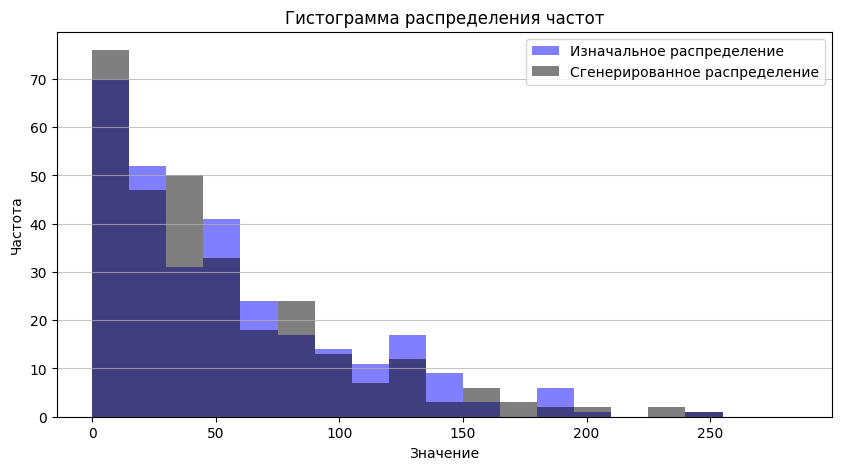

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(arr, bins=bins, color='blue', alpha=0.5, label='Изначальное распределение')
plt.hist(samples[300], bins=bins, color='black', alpha=0.5, label='Сгенерированное распределение')
plt.title('Гистограмма распределения частот')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.legend()

In [ ]:
for size in sample_sizes:
    t = samples[size]

    local_stats = local[size]

    mean_local = t.mean()
    var_local = t.var()
    std_local = t.std()
    cov_local = std_local / mean_local

    confidence_levels = [0.99, 0.95, 0.90]

    margins_local = {}

    for confidence in confidence_levels:
        z_value = stats.norm.ppf(1 - (1 - confidence) / 2)

        margins_local[confidence] = z_value * (std_local / np.sqrt(size))

    print(f"""
        Статистики для ряда длиной {size}:
        Матожидание: {mean_local} ({100 * np.abs(mean_local - local_stats['mean']) / local_stats['mean']})
        Дисперсия: {var_local} ({100 * np.abs(var_local - local_stats['var']) / local_stats['var']})
        СКО: {std_local} ({100 * np.abs(std_local - local_stats['std']) / local_stats['std']})
        Ковариация: {cov_local} ({100 * np.abs(cov_local - local_stats['cov']) / local_stats['cov']})
        Доверительный интервал (0.9): {margins_local[0.9]} ({100 * np.abs(margins_local[0.9] - local_stats['margins'][0.9]) / local_stats['margins'][0.9]})
        Доверительный интервал (0.95): {margins_local[0.95]} ({100 * np.abs(margins_local[0.95] - local_stats['margins'][0.95]) / local_stats['margins'][0.95]})
        Доверительный интервал (0.99): {margins_local[0.99]} ({100 * np.abs(margins_local[0.99] - local_stats['margins'][0.99]) / local_stats['margins'][0.99]})
    """)


        Статистики для ряда длиной 10:
        Матожидание: 48.93935457015901 (22.741158131418068)
        Дисперсия: 2306.212714566425 (97.04819657194362)
        СКО: 48.02304357874899 (40.37385674403322)
        Ковариация: 0.98127660245097 (14.365758708041476)
        Доверительный интервал (0.9): 24.979108698363923 (40.373856744033226)
        Доверительный интервал (0.95): 29.764443846254096 (40.37385674403321)
        Доверительный интервал (0.99): 39.117109940675164 (40.37385674403324)
    

        Статистики для ряда длиной 20:
        Матожидание: 42.18539363728321 (28.622730808968875)
        Дисперсия: 1230.1531859390414 (30.870900168397434)
        СКО: 35.07353968362819 (16.856088718654462)
        Ковариация: 0.8314143038511413 (16.48513906972633)
        Доверительный интервал (0.9): 12.900063759051717 (16.856088718654465)
        Доверительный интервал (0.95): 15.371374055253666 (16.856088718654465)
        Доверительный интервал (0.99): 20.201409842041176 (16.856088

## Проведем автокорреляционный анализ на полученном ряду

In [ ]:
autocorrelation_new = sm.tsa.acf(samples[300], nlags=10)

autocorr_new_df = pd.DataFrame({
    'Lag': np.arange(len(autocorrelation_new)),
    'Autocorrelation': autocorrelation_new,
    'Autocorrelation_old': autocorrelation
})

autocorr_new_df['percent'] = 100 * (np.abs(autocorr_new_df['Autocorrelation'] - autocorr_df['Autocorrelation']) / np.abs(autocorr_df['Autocorrelation']))

In [ ]:
autocorr_new_df

,Lag,Autocorrelation,Autocorrelation_old,percent
0,0,1.000000,1.000000,0.000000
1,1,0.062035,0.064917,4.439700
2,2,0.059204,0.079069,25.124066
3,3,-0.007207,0.030943,123.290180
4,4,0.054289,-0.021989,346.889245
5,5,0.064873,-0.008256,885.768905
6,6,-0.003825,-0.022973,83.349826
7,7,-0.017640,0.090840,119.418271
8,8,0.001774,-0.028862,106.146380
9,9,-0.064419,0.119832,153.757341


### Нахождение корреляции между массивами

In [ ]:
correlation_matrix = np.corrcoef(np.sort(arr), np.sort(samples[300]))
correlation_matrix[0, 1]

0.9690931000468671